## Этап 1. Испортирование библиотек, настроек. Знакомство с данными.

### 1.1 Импортирование библиотек

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from pymystem3 import Mystem # импортируем pymystem3
from collections import Counter
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файлов и знакомство с данными

Прочитаем датасет с данными о заведениях общественного питания Москвы и сохраним его в переменную **rest_data**:

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

Посмотрим на 10 случайный строк датасета:

In [3]:
rest_data.sample(10)

,id,object_name,chain,object_type,address,number
8379,24151,ШОКОЛАДНИЦА,да,кафе,"город Москва, улица Воздвиженка, дом 9, строен...",75
457,20631,La SPEZIA,нет,бар,"город Москва, Комсомольский проспект, дом 30",50
198,124201,"Шаурма, выпечка",нет,предприятие быстрого обслуживания,"город Москва, 3-я Владимирская улица, дом 27",0
14795,221526,PivBar,нет,бар,"город Москва, город Московский, 1-й микрорайон...",10
15264,211308,Милти,да,предприятие быстрого обслуживания,"город Москва, Дмитровское шоссе, дом 89",2
14441,207774,Ресторан «Бульвар»,нет,ресторан,"город Москва, Керамический проезд, дом 4, стро...",200
5293,91252,Макдоналдс,да,ресторан,"город Москва, улица Пришвина, дом 22",82
9358,167133,Live Stars,нет,ресторан,"город Москва, Берсеневский переулок, дом 5, ст...",118
868,25282,Саамо,нет,кафе,"город Москва, Первомайская улица, дом 87",30
4314,150084,Французская кондитерская,нет,кафе,"город Москва, улица Щепкина, дом 47, строение 1",20


Здесь встречаются такие столбцы как: 
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

Познакомимся с общей информацией по таблице:

In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Помимо 6 столбцов, таблица имеет 15366 строк. Типы данных подходящие, пропусков нет. Проверим также таблицу на дубликаты:

In [5]:
rest_data.duplicated().sum()

0

Явных дубликатов не наблюдается.

**Вывод:**

Импортировав датасет с заведениями общественного питания Москвы, можно заявить следующее:
* Таблица имеет 6 столбцов
* Таблица имеет 15366 строк
* Для столбцов установлены подходящие типы данных
* Пропуски отсуствуют
* Явных дубликатов нет.

## Этап 2. Анализ данных

### 2.1 Исследование соотношения видов объектов общественного питания по количеству. 

Посмотрим какое количество заведений содержит каждый вид общественного питания:

In [6]:
rest_data['object_type'].value_counts().reset_index().rename(columns={'index':'object_type', 'object_type':'count'}) 


,object_type,count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Посмотрим также на соотношение визуально:

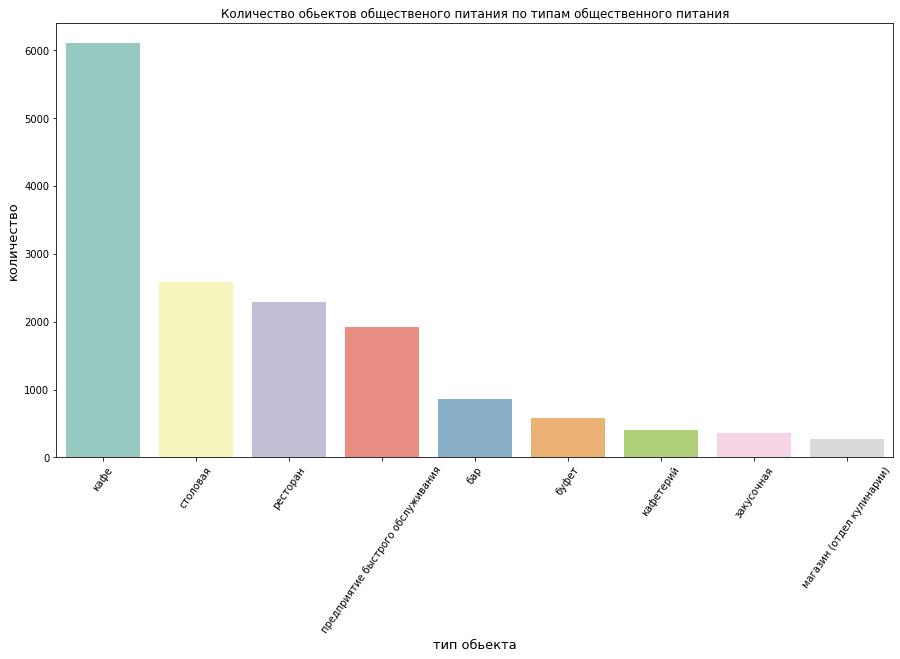

In [7]:
plt.figure(figsize=(15, 8))
sns.countplot(x='object_type', data=rest_data, palette="Set3",   order = rest_data['object_type'].value_counts().index ) 
plt.xticks(rotation=55)
plt.title("Количество обьектов общественого питания по типам общественного питания")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Также посмотрим на процентное соотношение :

In [8]:
object_percent = ((rest_data['object_type'].
                   value_counts(normalize=True)* 100).
                  reset_index().
                  rename(columns={'index':'object_type', 'object_type':'percent'}))
object_percent

,object_type,percent
0,кафе,39.69
1,столовая,16.84
2,ресторан,14.87
3,предприятие быстрого обслуживания,12.51
4,бар,5.57
5,буфет,3.81
6,кафетерий,2.59
7,закусочная,2.34
8,магазин (отдел кулинарии),1.78


И для наглядности визуально:

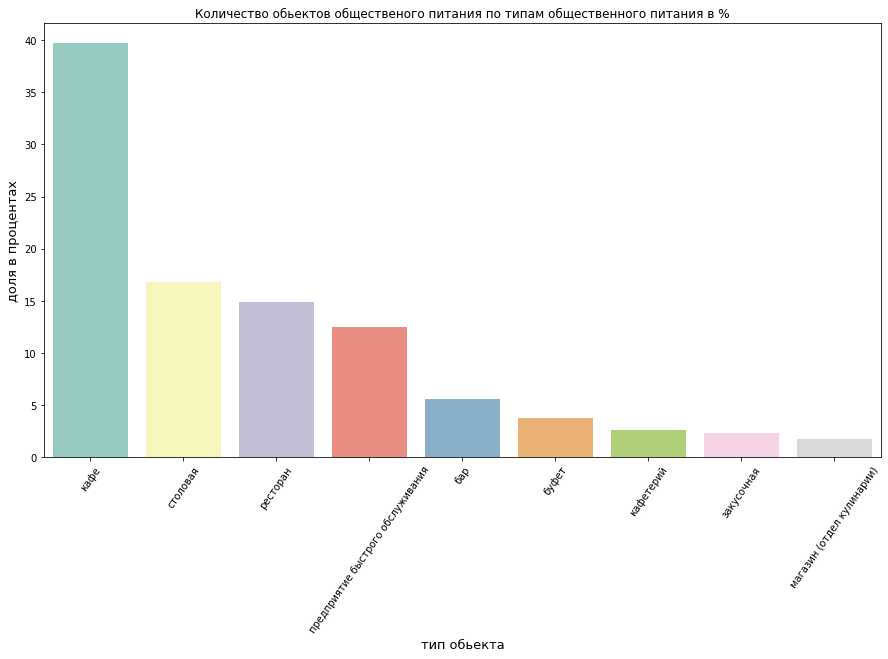

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(x='object_type', 
            y='percent', 
            data=object_percent, palette="Set3")
plt.xticks(rotation=55)
plt.title("Количество обьектов общественого питания по типам общественного питания в %")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("доля в процентах",size = 13)
plt.show()

Наибольшее количество заведений имеет такой вид общественного питания как кафе - 6099 заведений, его доля составляет 39.69%. Это можно объяснить универсальным названием для рынка России и отсутствием конкретики в показателях работы и определений под классификации общественного питания. Кафе - это тот же ресторан , но с наименьшим количеством блюд в меню и некоторыми "поблажками", в то же время кафе можно назвать и просто кафетерий с добавлением пары коронных блюд в меню, также и столовую с линией раздачи, но с повышенным комфортом. Второе место занимает такой тип общественного питания как столовая - 2587 заведений с долей 16.84%. В Москве много бизнес-центров, которым необходимы столовые. Третий по количеству тип заведений общественного питания - рестораны с количеством 2285 заведений и с долей 14.87%. Опять же отсутствие четких обозначений для определений видов общественного питания вносит свою лепту, рестораном могут называть заведения даже исходя из маркетинговых соображений, но также спросом пользуются и заведения с повышенным комфортом и высоким уровнем обслуживания, в том числе "элитные" рестораны. Замыкают список количества видов общественных заведений - кафетерий с долей 2.59%, закусочная с долей 2.34%, магазин (отдел кулинарии)	с долей 1.78%. 

### 2.2 Исследование соотношения сетевых и несетевых заведений по количеству.

Посмотрим на соотношения сетевых и несетевых заведений по кличесеству:

In [10]:
rest_data['chain'].value_counts().reset_index().rename(columns={'index':'chain', 'chain':'count'})


,chain,count
0,нет,12398
1,да,2968


Также посмотрим визуально:

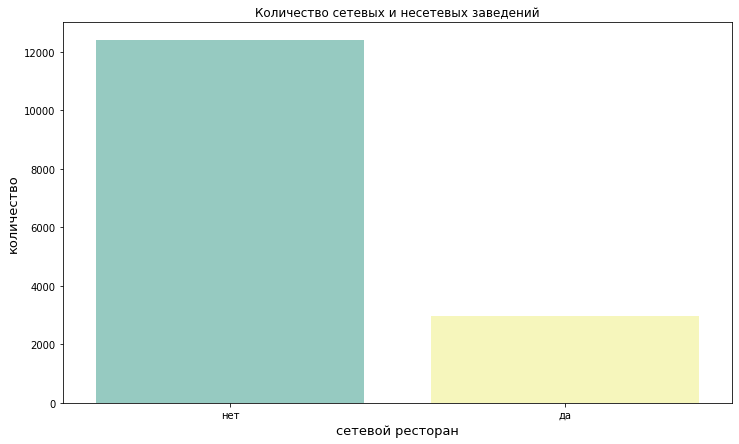

In [11]:
plt.figure(figsize=(12, 7))
sns.countplot(x='chain', data=rest_data, palette="Set3",   order = rest_data['chain'].value_counts().index ) 
plt.title("Количество сетевых и несетевых заведений")
plt.xlabel("сетевой ресторан", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Также визуально посмотрим на круговой диаграмме в процентном соотношении:

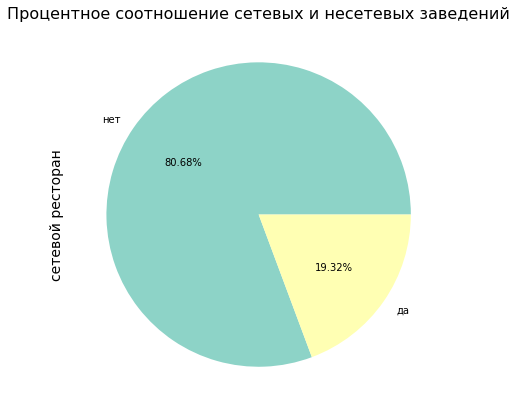

In [12]:
plt.figure(figsize=(12,7))
rest_data['chain'].value_counts().plot.pie(subplots=True, figsize=(12, 8),autopct='%.2f%%',colors = sns.color_palette("Set3"))
plt.ylabel('сетевой ресторан', fontsize=14)
plt.title('Процентное соотношение сетевых и несетевых заведений', fontsize=16)
plt.show()

12938 заведений с долей 80.68% являются несетевыми, в то время как 2968 заведений с долей 19.32% напротив - сетевые. Такое соотношение можно объяснить тем, что ресторанный бизнес очень интересен людям, имеется много стартапов и новых бизнес моделей для ресторанного бизнеса, для некоторых это свое рода больше "любимое дело", чем бизнес. Ресторанный бизнес привлекает много "новичков" в этом деле, несмотря на порой долгую окупаемость. Выходя на прибыль, владельцы со временем открывают новые заведения, дав заведению другое название, в связи с чем доля несетевых заведений не пополняется. Что касаемо сетевых заведений, то уверенное участие в этом принимают такие крупные сети как McDonald's, Якитория, кофейни Starbucks и др.

### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

Посмотрим количество сетевых и несетевых обьектов общественого питания по типам общественного питания:

In [13]:
(rest_data.groupby(['object_type','chain'])['id'].count().
 reset_index().
 rename(columns={'id':'count'}).
 sort_values(['object_type','count'],ascending = False).
 set_index(['object_type','chain']))

count
object_type                       chain       
столовая                          нет     2584
                                  да         3
ресторан                          нет     1741
                                  да       544
предприятие быстрого обслуживания нет     1132
                                  да       791
магазин (отдел кулинарии)         нет      195
                                  да        78
кафетерий                         нет      346
                                  да        52
кафе                              нет     4703
                                  да      1396
закусочная                        нет      304
                                  да        56
буфет                             нет      574
                                  да        11
бар                               нет      819
                                  да        37

Посмотрим визуально:

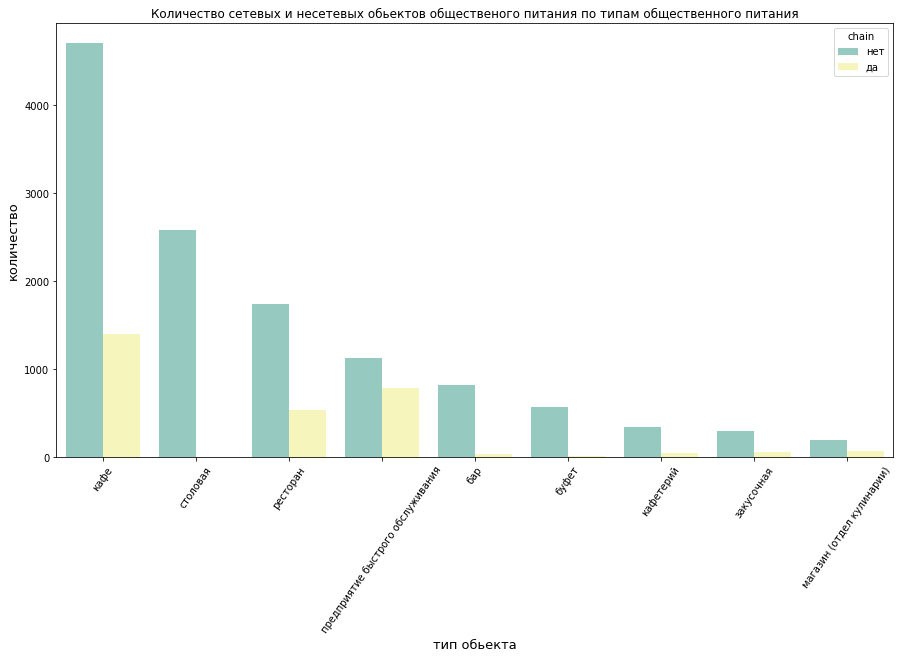

In [14]:
plt.figure(figsize=(15, 8))
sns.countplot(x='object_type', data=rest_data, hue = 'chain',palette="Set3",   order = rest_data['object_type'].value_counts().index ) 
plt.xticks(rotation=55)
plt.title("Количество сетевых и несетевых обьектов общественого питания по типам общественного питания")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Посмотрим в процентном соотношении сколько приходится сетевых и несетвых заведений на каждый тип общественного питания:

In [15]:
obj_chain_percent = ((rest_data.groupby(['object_type','chain'])['id'].count() 
 / rest_data.groupby(['object_type'])['id'].count() * 100)
.reset_index().rename(columns={'id':'percent'})).set_index(['object_type','chain']).reset_index()
#rest_data.groupby('object_type')['chain'].value_counts(normalize=True)*100
obj_chain_percent

,object_type,chain,percent
0,бар,да,4.32
1,бар,нет,95.68
2,буфет,да,1.88
3,буфет,нет,98.12
4,закусочная,да,15.56
5,закусочная,нет,84.44
6,кафе,да,22.89
7,кафе,нет,77.11
8,кафетерий,да,13.07
9,кафетерий,нет,86.93


Посмотрим визуально на процентное количество сетевых и несетевых обьектов общественого питания по типам общественного питания

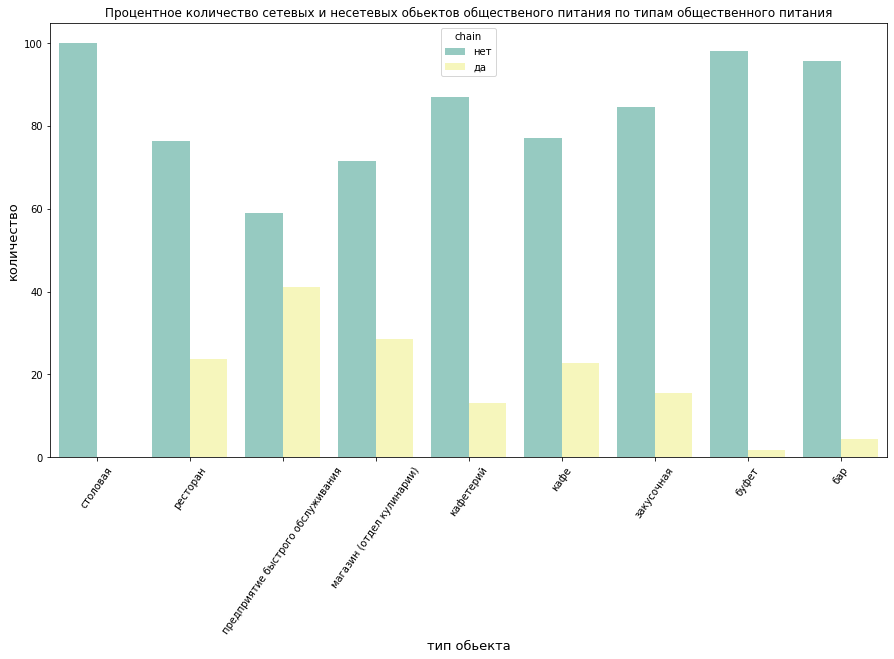

In [16]:
plt.figure(figsize=(15, 8))
sns.barplot(x= 'object_type',y = 'percent', hue ='chain', data=obj_chain_percent.sort_values(['object_type','percent'],ascending=False) , palette="Set3" ) 
plt.xticks(rotation=55)
plt.title("Процентное количество сетевых и несетевых обьектов общественого питания по типам общественного питания")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Также посмотрим процентное количество обьектов общественого питания по типам общественного питания для сетевого распространения:

In [17]:
chain_rest = rest_data.query('chain == "да"')
chain_rest_percent = ((chain_rest['object_type'].
                       value_counts(normalize=True)* 100).
                      reset_index().
                      rename(columns={'index':'object_type', 'object_type':'percent'}))
chain_rest_percent

,object_type,percent
0,кафе,47.04
1,предприятие быстрого обслуживания,26.65
2,ресторан,18.33
3,магазин (отдел кулинарии),2.63
4,закусочная,1.89
5,кафетерий,1.75
6,бар,1.25
7,буфет,0.37
8,столовая,0.10


Посмотрим визуально:

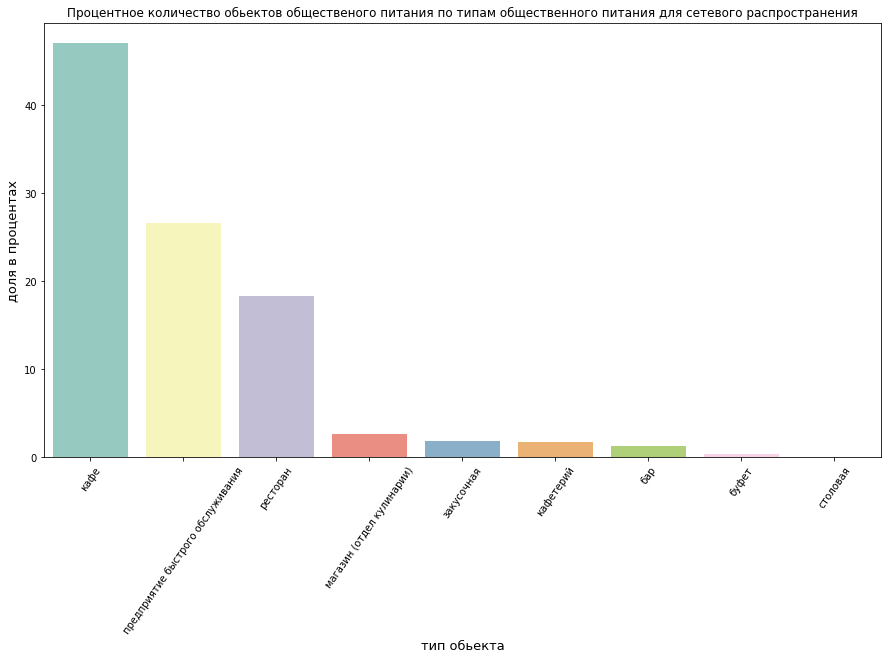

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(x='object_type', 
            y='percent', 
            data=chain_rest_percent, palette="Set3")
plt.xticks(rotation=55)
plt.title("Процентное количество обьектов общественого питания по типам общественного питания для сетевого распространения")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("доля в процентах",size = 13)
plt.show()

Исходя из этого можно сделать вывод, что сетевое расространение наиболее характерно для таких типов общественного питания как :
* Кафе
* Предприятия быстрого обслуживания
* Рестораны

Для остальных типов заведений сетевое распроастранение ни так характерно. Также отметим , что количественно в целом несетевых заведений по каждому типу общественогого питания больше.

### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для начала рассмотрим общую статистическую информацию о количестве посадочных мест для сетевых заведений:

In [19]:
chain_rest[['number']].describe()

,number
count,"2,968.00"
mean,52.92
std,57.14
min,0.00
25%,15.00
50%,40.00
75%,72.00
max,580.00


Посмотрим какое распределение имеют посадочные места для сетевых заведений :

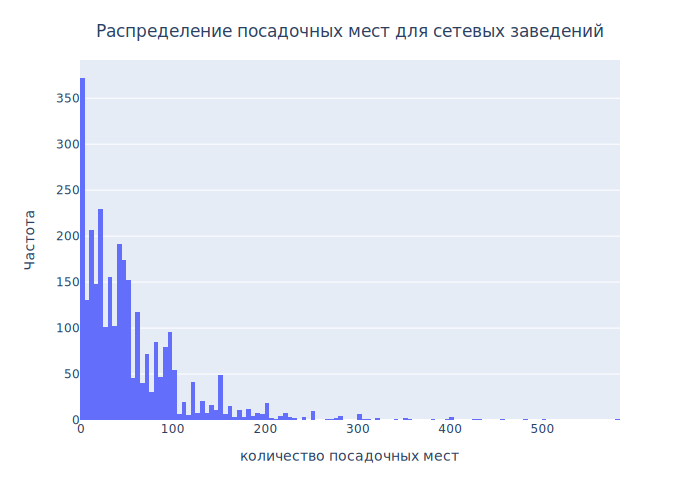

In [20]:
fig = px.histogram(chain_rest, x="number")
fig.update_layout(title={'text': "Распределение посадочных мест для сетевых заведений", 'xanchor': 'center', 'y':0.95,
        'x':0.5},
                  yaxis_title="Частота", xaxis_title='количество посадочных мест' )

fig.show('svg')

Как можно заметить распределение далеко от нормального, поэтому посмотрим по моде :

In [21]:
print('Мода распределения посадочных мест для сетевых заведений составляет {} мест'.format(chain_rest['number'].mode()[0]))

Мода распределения посадочных мест для сетевых заведений составляет 0 мест


Построим также интерактивный боксплот для наглядности, при наведении на который можно познакомиться с информацией:

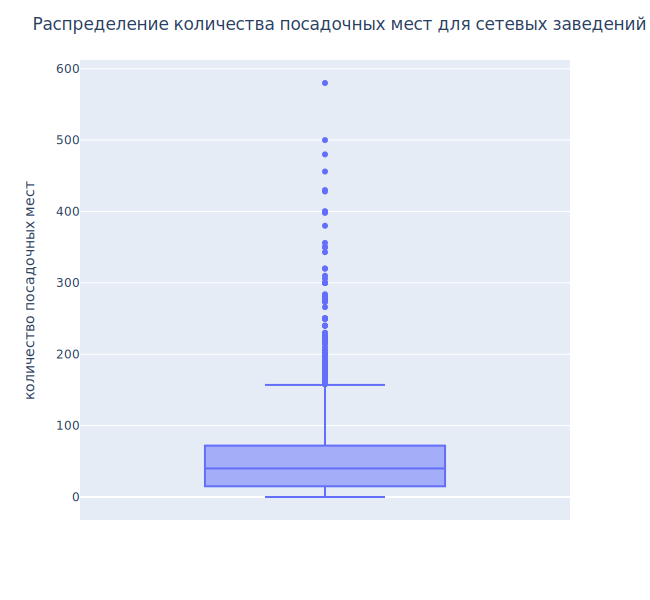

In [22]:
fig = px.box(chain_rest, y="number")
fig.update_layout(title="Распределение количества посадочных мест для сетевых заведений",
                  yaxis_title="количество посадочных мест", height=600, width = 650 )
fig.show('svg')

Отсюда можно отметить, что :
* Всего сетевых заведений 2968
* Среднее значение посадочных мест- 53
* Медианное значение 40 мест
* Значение моды составляет 0 мест
* До 75% значений имеет 72 посадочных места
* Максимально встречающее посадочное место - 580.
* На гистограмме боксплот видны аномальные значения, выше 157 посадочных мест

Таким образом для сетевых заведений характерно много заведений с небольшим числом посадочных мест.

### 2.5 Среднее количество посадочных места для каждого вида общественного питания.

Для начала создадим таблицу с 25,50,75 квантилем для каждого типа общественного питания:

In [23]:
# !pip install --upgrade pandas 

In [24]:
number_means = (rest_data.groupby('object_type')['number'].quantile([0.25, 0.5, 0.75]).
                unstack().sort_values(0.5, ascending = False)) #если ругается, то необходимо обновить pandas !pip install --upgrade pandas
number_means

,0.25,0.50,0.75
object_type,,,
столовая,50.00,103.00,200.00
ресторан,46.00,80.00,114.00
бар,20.00,35.00,50.00
буфет,14.00,32.00,80.00
кафе,15.00,30.00,50.00
кафетерий,0.00,6.00,12.00
предприятие быстрого обслуживания,0.00,5.00,25.00
закусочная,0.00,0.00,10.00
магазин (отдел кулинарии),0.00,0.00,8.00


Посмотрим визуально по медианным значениям посадочных мест для каждого типа общественного заведения:

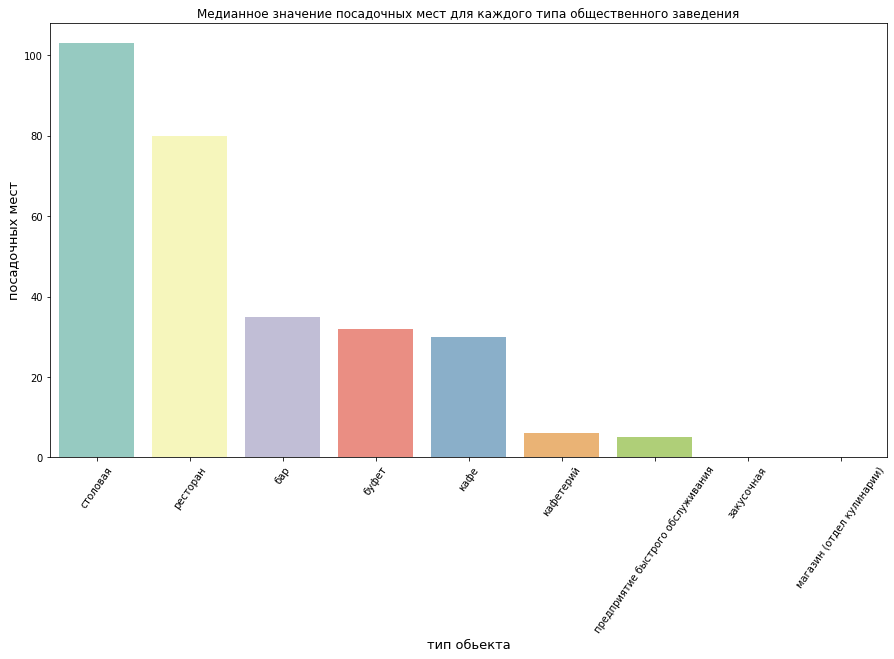

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(x=number_means.index, 
            y=0.5, 
            data=number_means, palette="Set3")
plt.xticks(rotation=55)
plt.title("Медианное значение посадочных мест для каждого типа общественного заведения")
plt.xlabel("тип обьекта", size = 13)
plt.ylabel("посадочных мест",size = 13)
plt.show()

Также посмотрим на гистограмму "ящик с усами" с возможностью увеличения для каждого типа общественного питания:

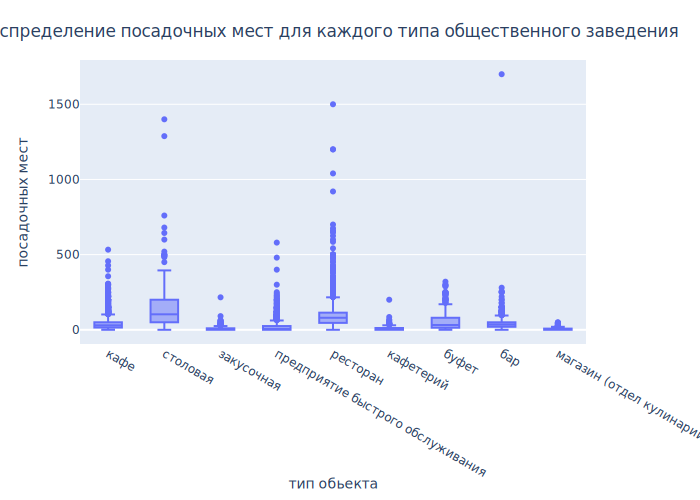

In [26]:
fig = px.box(rest_data,x='object_type',y= 'number')
fig.update_layout(title={'text': "Распределение посадочных мест для каждого типа общественного заведения", 
                         'xanchor': 'center', 'y':0.95, 'x':0.47},
                  yaxis_title="посадочных мест", xaxis_title='тип обьекта' )

fig.show('svg')

Также посмотрим на изменения посадочных мест для каждого типа, в зависимости от того, сетевой ресторан или нет:

In [27]:
number_means_chain = rest_data.groupby(['object_type','chain'])['number'].quantile([0.25, 0.5, 0.75]).unstack().reset_index() # если ругается, то надо !pip install --upgrade pandas
number_means_chain

,object_type,chain,0.25,0.5,0.75
0,бар,да,25.00,45.00,80.00
1,бар,нет,20.00,34.00,50.00
2,буфет,да,0.00,0.00,10.00
3,буфет,нет,15.00,32.00,80.00
4,закусочная,да,0.00,8.00,24.00
5,закусочная,нет,0.00,0.00,8.00
6,кафе,да,20.00,40.00,60.00
7,кафе,нет,15.00,30.00,48.00
8,кафетерий,да,0.00,8.00,15.25
9,кафетерий,нет,0.00,6.00,10.00


Посмотрим визуально на медианные значения:

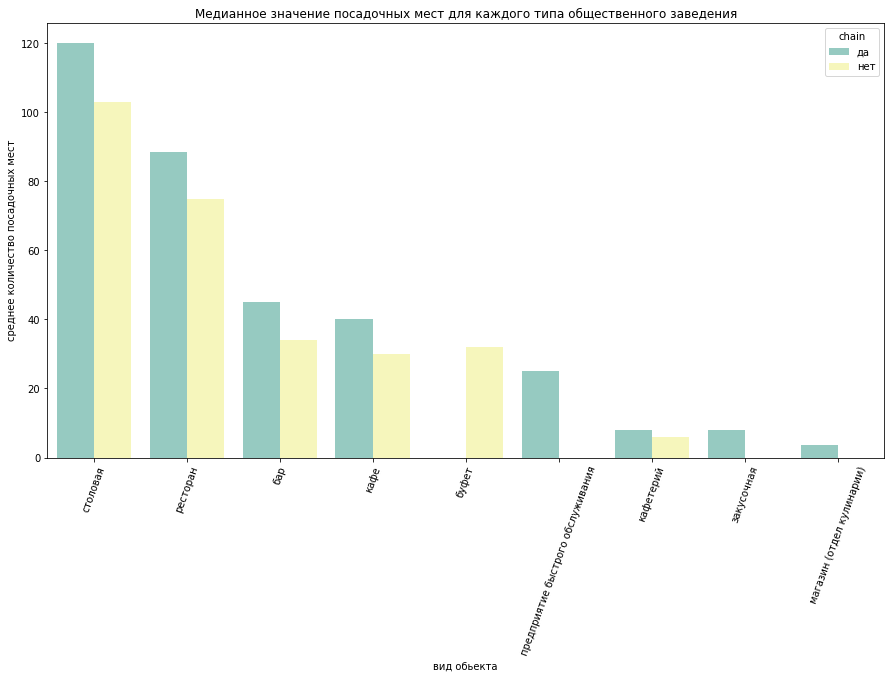

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(x='object_type', y=0.5, data=number_means_chain.sort_values(0.5, ascending = False), hue='chain',palette="Set3")
plt.xticks(rotation=70)
plt.title("Медианное значение посадочных мест для каждого типа общественного заведения")
plt.xlabel("вид обьекта")
plt.ylabel("среднее количество посадочных мест")
plt.show()

Посмотрим детально на боксплоте:

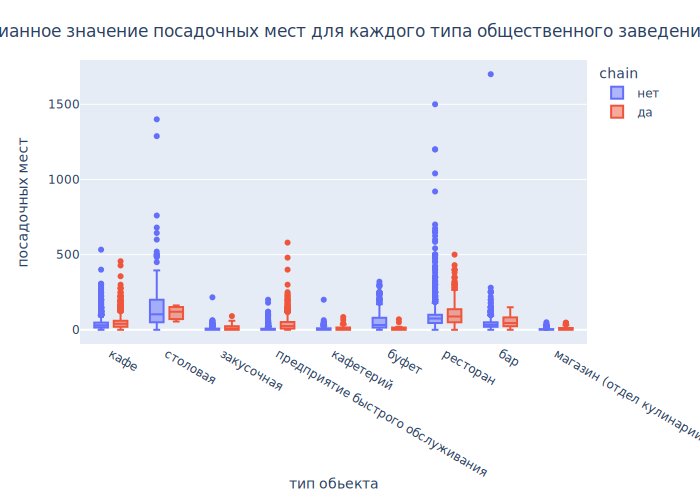

In [29]:
fig = px.box(rest_data,x='object_type',y= 'number', color ='chain')
fig.update_layout(title={'text': "Медианное значение посадочных мест для каждого типа общественного заведения", 'xanchor': 'center', 'y':0.95,
        'x':0.48},
                  yaxis_title="посадочных мест", xaxis_title='тип обьекта' )
fig.show('svg')

Таким образом можно отметить,что наибольшее медианное значение посадочных мест в столовых  - 103 посадочных места. Следом идут рестораны с медианным значением посадочных мест - 80 мест и следом бары - 30 мест. Для закусочных и магазинов медианное значение составляет - 0 мест. Также хочется отметить, что медианные значения посадочных мест у сетевых заведений везде больше, помимо такого типа общественного питания как кафе. В тех же закусочных и магазинов для сетевых заведений посадочных мест - 8 и 3.5 соответственно, в то время как для несетевых заведений медианные значения в обоих случаях - 0 мест.

### 2.6 Добавление в отдельный столбец улицы.

Создадим с помощью лемматизации функцию для определения улицы:

In [30]:
m = Mystem()
def find_street(row): 
    lem_street = m.lemmatize(row['street1'])
    if 'город' in lem_street:
        return row['street2']
    if 'поселение' in lem_street:
        return row['street2']
    return row['street1']
rest_data['street1'] = rest_data['address'].str.split(',', expand=True)[1]
rest_data['street2'] = rest_data['address'].str.split(',', expand=True)[2]               


Применим функцию и избавимся от лишних столбцов, созданных при создании функции:

In [31]:
rest_data['street'] = rest_data.apply(find_street, axis=1)
del rest_data['street1']
del rest_data['street2']

Так как в **street** не стандартная запись, применим функцию для избавления от пробелов:

In [32]:
rest_data['street'] = rest_data['street'].map(lambda x: x[1:len(x)])
# rest_data['street2']=rest_data['street'].str.strip() 

Посмотрим на 10 случайных строк таблицы с сохранением порядка:

In [33]:
rest_data.sample(10, random_state = 43)

,id,object_name,chain,object_type,address,number,street
11047,179407,Кафе,нет,кафетерий,"город Москва, улица Золоторожский Вал, дом 38,...",0,улица Золоторожский Вал
8275,150702,Столовая,нет,столовая,"город Москва, улица Большая Ордынка, дом 15",144,улица Большая Ордынка
10611,181227,Kitchen,нет,кафе,"город Москва, улица Крылатские Холмы, дом 33, ...",50,улица Крылатские Холмы
233,89471,Клуб «Высотка»,нет,бар,"город Москва, Кудринская площадь, дом 1",80,Кудринская площадь
6167,141191,Бургер Кинг,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 24, корпус 3",4,Азовская улица
14648,221059,Шаурма-Чебуреки,нет,предприятие быстрого обслуживания,"город Москва, улица Ленинская Слобода, дом 26",0,улица Ленинская Слобода
6190,73356,Менза,да,ресторан,"город Москва, Профсоюзная улица, дом 118",90,Профсоюзная улица
9045,162642,Пиццерия,нет,столовая,"город Москва, поселение Марушкинское, деревня ...",20,деревня Крёкшино
10716,29480,ГБОУ г.Москвы школа № 609,нет,столовая,"город Москва, город Зеленоград, корпус 314",180,корпус 314
8432,22442,Халяль,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",22,Нижняя Красносельская улица


Проверим имеются ли пропущенные значения в новом столбце:

In [34]:
rest_data['street'].isnull().sum()

0

Успешно добавили в отдельный столбец улицу из адреса, пропущенных значений нет.

### 2.7 Топ-10 улиц по количеству объектов общественного питания.

Посмотрим наиболее обширные улицы по количеству заведений :

In [35]:
top_10_street = rest_data['street'].value_counts().reset_index().rename(columns={'index':'street', 'street':'count'}).head(10)
top_10_street

,street,count
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Посмотрим на эти улицы в виде столбчатой диаграммы:

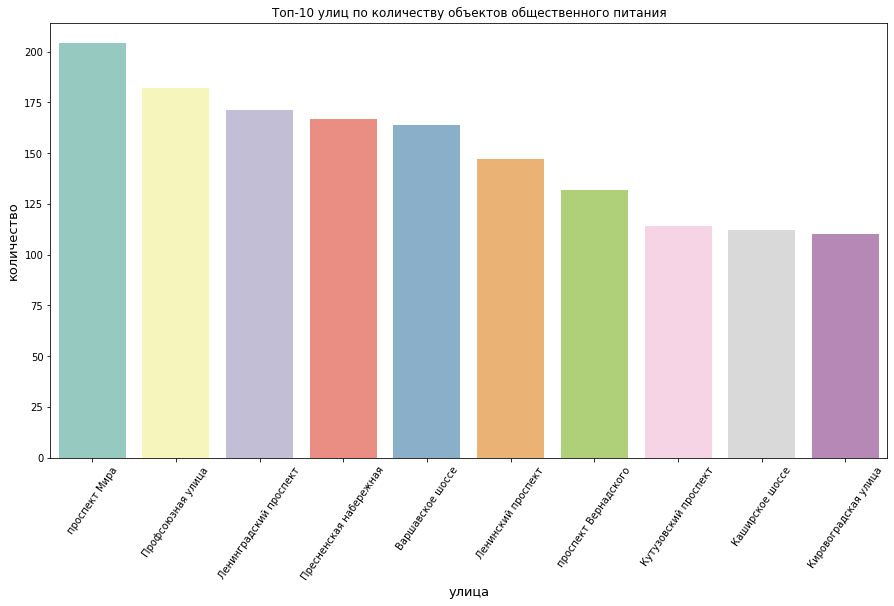

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x='street', 
            y='count', 
            data=top_10_street, palette="Set3")
plt.xticks(rotation=55)
plt.title("Топ-10 улиц по количеству объектов общественного питания")
plt.xlabel("улица", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Также посмотрим сколько данные топ-10 улиц занимают в процентном соотношении от всех :

In [37]:
top10_perc = ((rest_data['street'].
                   value_counts(normalize=True)* 100).
                  reset_index().
                  rename(columns={'index':'street', 'street':'percent'})).head(10)
top10_perc

,street,percent
0,проспект Мира,1.33
1,Профсоюзная улица,1.18
2,Ленинградский проспект,1.11
3,Пресненская набережная,1.09
4,Варшавское шоссе,1.07
5,Ленинский проспект,0.96
6,проспект Вернадского,0.86
7,Кутузовский проспект,0.74
8,Каширское шоссе,0.73
9,Кировоградская улица,0.72


Также посмотрим визуально:

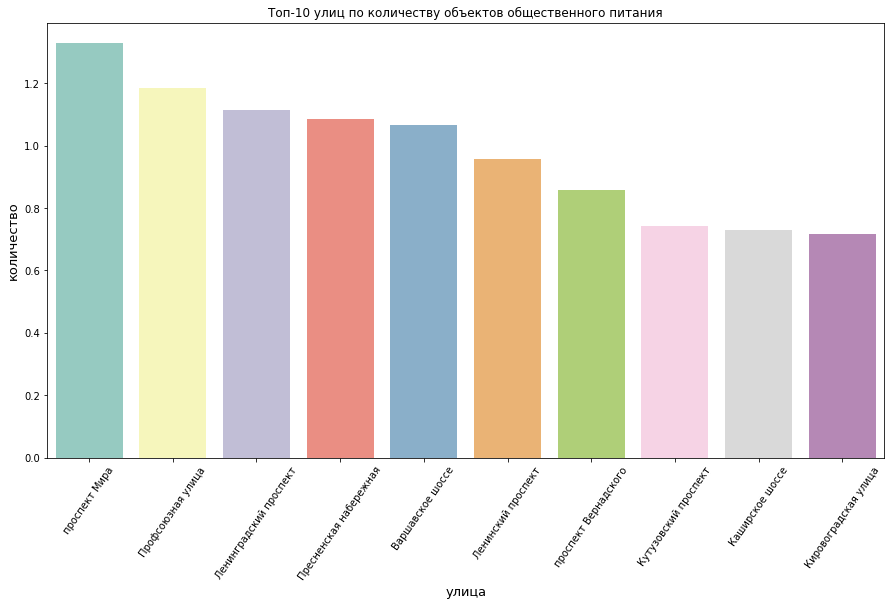

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(x='street', 
            y='percent', 
            data=top10_perc, palette="Set3")
plt.xticks(rotation=55)
plt.title("Топ-10 улиц по количеству объектов общественного питания")
plt.xlabel("улица", size = 13)
plt.ylabel("количество",size = 13)
plt.show()

Самая популярная улица - проспект Мира, на ней 204 заведения, следом идет Профсоюзная улица - 182 заведения, замыкает тройку Ленинградский проспект, имебщий 171 заведение. Закрывает список топ-10 улиц - Кутузовский проспект, имеющий 114 заведений, предпоследняя позиция в топ-10 у Каширского шоссе с количеством 112 заведений и замыкает топ-10 - Кировоградская улица с количеством 110 заведений. 

Посмотрим в каким районах располгаются данные улицы. Для этого обратимся к внешней информации и сохраним в датасет **district** файл с локациями:

In [39]:
district = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1')

Посмотрим на данный датасет:

In [40]:
district

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Объединим топ-10 улиц со списком районов:

In [41]:
top10_streets_merged = top_10_street.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
del top10_streets_merged['streetname']

In [42]:
top10_streets_merged.head(10)

,street,count,okrug,area
0,проспект Мира,204,СВАО,Алексеевский район
1,проспект Мира,204,СВАО,Ярославский Район
2,проспект Мира,204,СВАО,Район Марьина роща
3,проспект Мира,204,СВАО,Останкинский район
4,проспект Мира,204,СВАО,Район Ростокино
5,проспект Мира,204,СВАО,Район Свиблово
6,проспект Мира,204,ЦАО,Мещанский район
7,Профсоюзная улица,182,ЮЗАО,Академический район
8,Профсоюзная улица,182,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,ЮЗАО,Район Ясенево


Как можно заметить в Москве одна улица может распологаться сразу в несколько районах. К примеру улица проспект Мира распологается сразу в 7 районах города Москвы, в том числе в 2 округах. 

### 2.8 Число улиц с одним объектом общественного питания.

Посмотрим на такие улицы, где размещен лишь один объект общественного питания:

In [43]:
one_rest = (rest_data['street'].value_counts().
            reset_index().
            rename(columns={'index':'street', 'street':'count'}).
            query('count ==1'))
one_rest

,street,count
1414,Лечебная улица,1
1415,корпус 403А,1
1416,Пенягинская улица,1
1417,корпус 1128,1
1418,4-я Кабельная улица,1
...,...,...
2122,Большая Ширяевская улица,1
2123,39-й километр Калужского шоссе,1
2124,улица Екатерины Будановой,1
2125,Берниковская набережная,1


Объединим их с районами :

In [44]:
one_streets_merged = one_rest.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
del one_streets_merged['streetname']

Сгруппируем по районам в порядке убывания улиц:

In [45]:
one_str_dict = one_streets_merged.groupby('area')['street'].count().sort_values(ascending=False).reset_index()
one_str_dict

,area,street
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
...,...,...
96,Район Марьино,1
97,Район Метрогородок,1
98,Район Москворечье-Сабурово,1
99,Район Нагатино-Садовники,1


Также рассмотрим визуально:

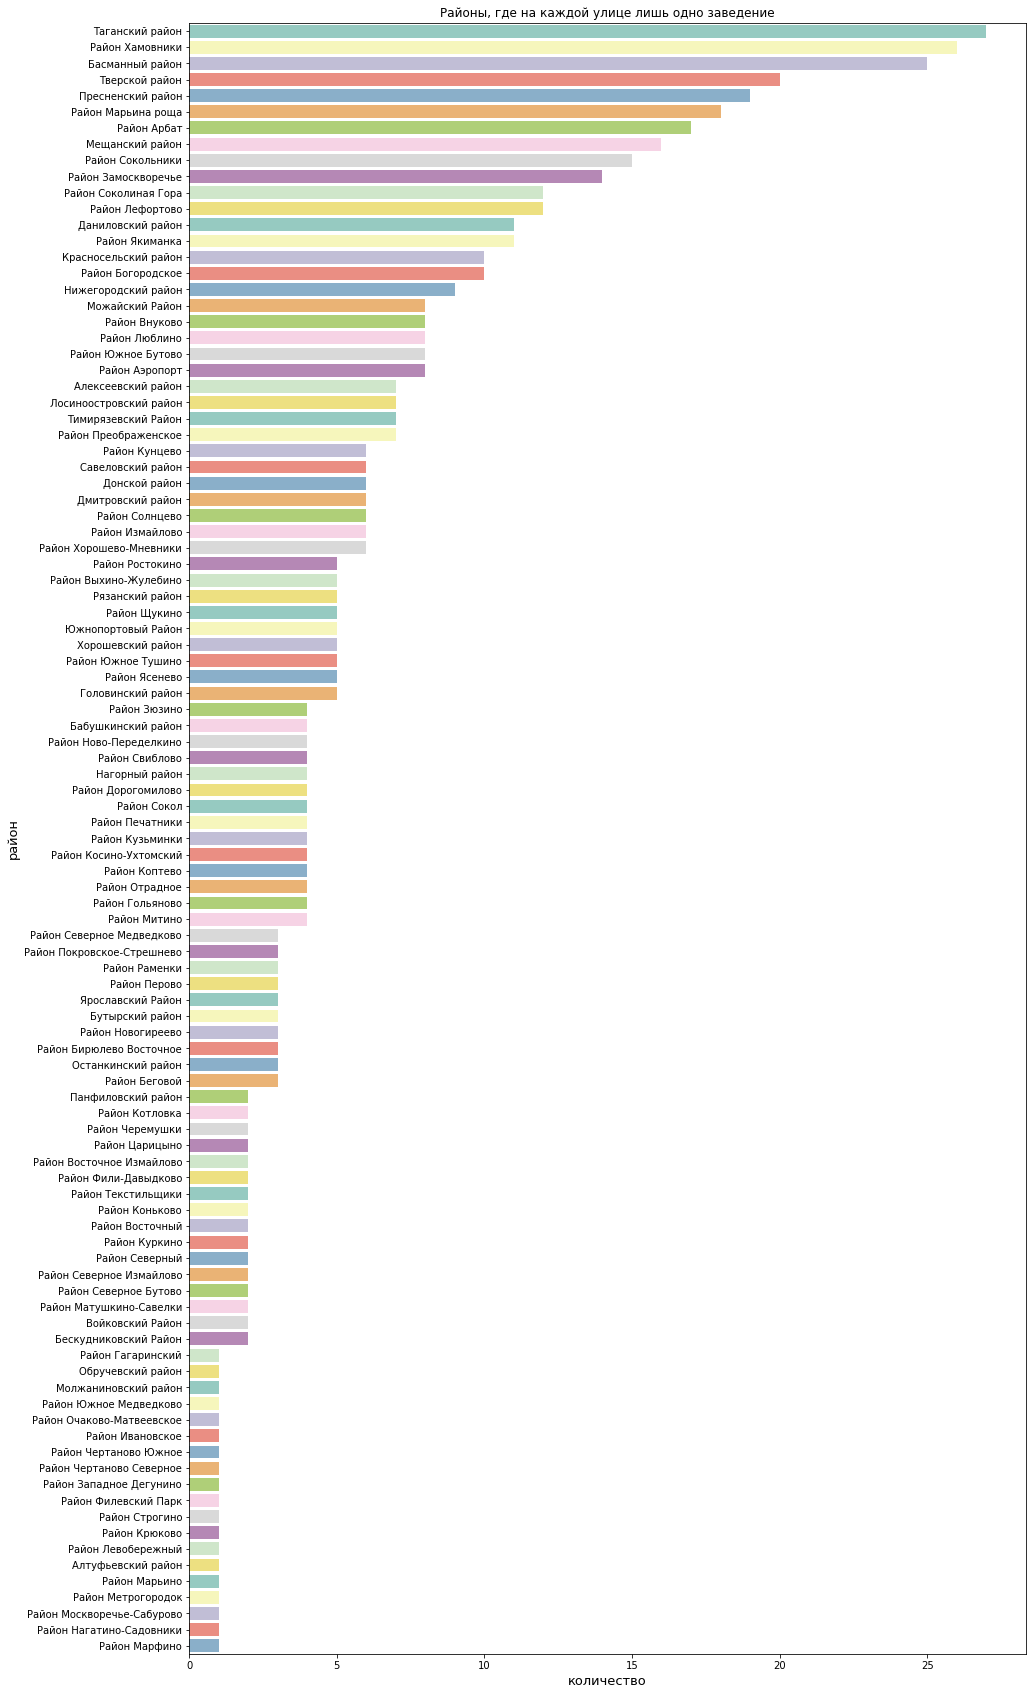

In [46]:
plt.figure(figsize=(15, 30))
sns.barplot(x='street', 
            y='area', 
            data=one_str_dict, palette="Set3")
plt.title("Районы, где на каждой улице лишь одно заведение")
plt.xlabel("количество", size = 13)
plt.ylabel("район",size = 13)
plt.show()

Заведений, где на одной улице всего одно заведения общественного питания - 713. Если акцентировать внимание на районы, то наибольшее число улиц, где всего одно заведение это Таганский район - 27 заведений, Район Хамовники - 26, Басманный район - 25, Тверской район	- 20, Пресненский район - 19 заведений. Также встречаются районы, где располагается всего одно заведение общественного питания.

### 2.9 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Создадим переменную, куда войдут заведения из топ-10 улиц:

In [47]:
top_street_rest = rest_data[rest_data['street'].isin(top_10_street['street'])]

Посмотрим на полученный датасет:

In [48]:
top_street_rest

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,ДОДО пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,Мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


Посмотрим на основые статистические показатели по посадочным местам для топ-10 улиц:

In [49]:
top_street_rest[['number']].describe()

,number
count,"1,503.00"
mean,57.97
std,89.98
min,0.00
25%,12.00
50%,40.00
75%,75.00
max,"1,700.00"


Посмотрим на распределение визуально:

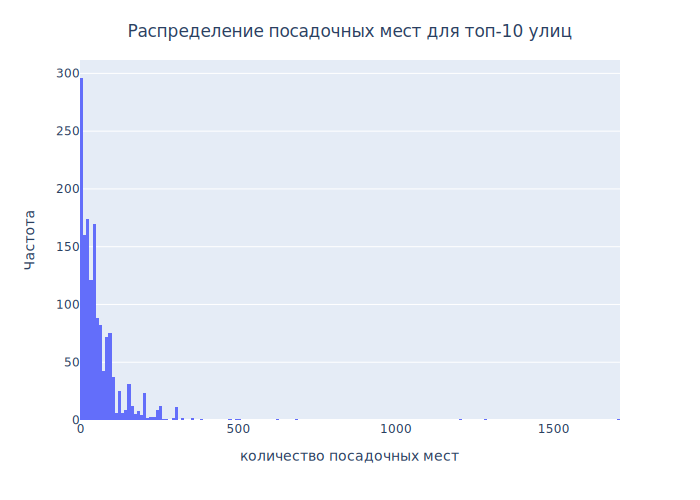

In [50]:
fig = px.histogram(top_street_rest, x="number")
fig.update_layout(title={'text': "Распределение посадочных мест для топ-10 улиц", 'xanchor': 'center', 'y':0.95,
        'x':0.5},
                  yaxis_title="Частота", xaxis_title='количество посадочных мест' )

fig.show('svg')

Распределение далеко от нормального, поэтому посмотрим по моде :

In [51]:
print('Мода распределения посадочных мест для сетевых заведений составляет {} мест'.format(top_street_rest['number'].mode()[0]))

Мода распределения посадочных мест для сетевых заведений составляет 0 мест


Построим также интерактивный боксплот для наглядности, при наведении на который можно познакомиться с информацией:

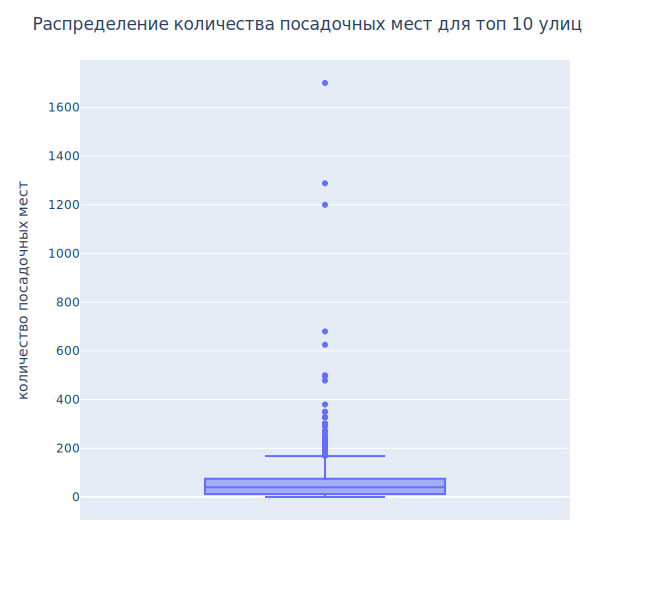

In [52]:
fig = px.box(top_street_rest, y="number")
fig.update_layout(title="Распределение количества посадочных мест для топ 10 улиц",
                  yaxis_title="количество посадочных мест", height=600, width = 650 )
fig.show('svg')

В топ-10 улиц входит 1503 заведения. Максимальное количество посадочных мест - 1700. Минимальное и значение моды совпадает-0 посадочных мест. Медианное значение 40 посадочных мест. Вприцнипе в 75% заведениях не более 75 мест.

Посмотрим на 25,50,75 квантиль для каждой по каждой улице из топ-10 улиц:

In [53]:
street_numb = (top_street_rest.groupby('street')['number'].quantile([0.25, 0.5, 0.75]).
                unstack().sort_values(0.5, ascending = False)) #если ругается, то необходимо обновить pandas !pip install --upgrade pandas
street_numb

,0.25,0.50,0.75
street,,,
проспект Мира,20.00,46.50,90.00
Ленинский проспект,20.00,45.00,80.00
Кутузовский проспект,20.00,40.00,96.00
Ленинградский проспект,15.00,40.00,70.00
проспект Вернадского,20.00,40.00,80.00
Варшавское шоссе,8.00,30.00,64.25
Кировоградская улица,6.00,30.00,68.50
Пресненская набережная,8.50,30.00,50.00
Каширское шоссе,7.50,25.00,76.25


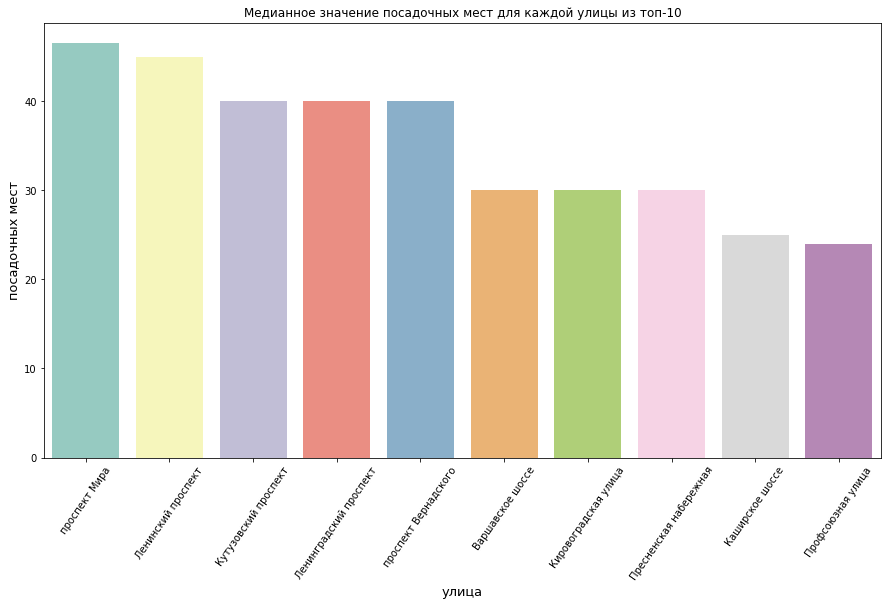

In [54]:
plt.figure(figsize=(15, 8))
sns.barplot(x=street_numb.index, 
            y=0.5, 
            data=street_numb, palette="Set3")
plt.xticks(rotation=55)
plt.title("Медианное значение посадочных мест для каждой улицы из топ-10")
plt.xlabel("улица", size = 13)
plt.ylabel("посадочных мест",size = 13)
plt.show()

Обратимся к боксплоту для более подробной демонстрации, гистограмма интерактивная:

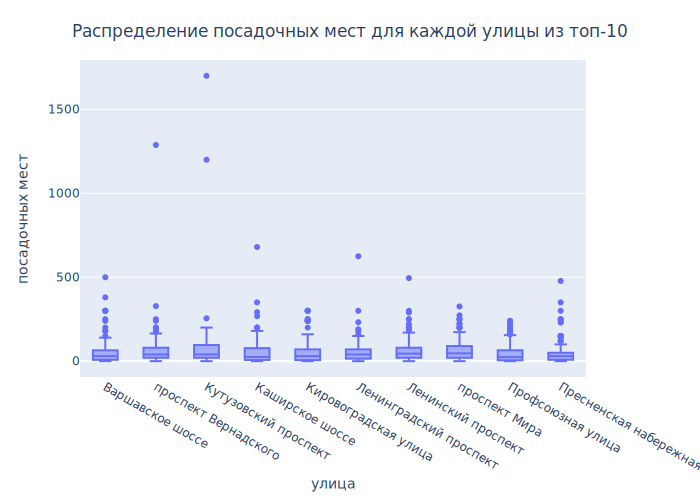

In [55]:
fig = px.box(top_street_rest,x='street',y= 'number')
fig.update_layout(title={'text': "Распределение посадочных мест для каждой улицы из топ-10", 
                         'xanchor': 'center', 'y':0.95, 'x':0.5},
                  yaxis_title="посадочных мест", xaxis_title='улица' )

fig.show('svg')

В зависимости от улицы меняется медианное значение посадочных мест. Наибольшее количество у улицы проспект Мира - 47 мест. Следом идут Ленинский и Кутузовский проспекты с медианным значением посадочных мест 45 и 40. Закрывает топ-10 улица Профсоюзная с медианным значением 24 посадочных места.

Также посмотрим как распределяется каждый тип общественного питания на каждой из топ-10 улиц:

In [56]:
street_numb_obj = (top_street_rest.groupby(['street','object_type'])['number'].quantile([0.25, 0.5, 0.75]).
                unstack()) #если ругается, то необходимо обновить pandas !pip install --upgrade pandas
street_numb_obj

0.25  0.50   0.75
street           object_type                                         
Варшавское шоссе бар                               28.50 31.00  39.50
                 буфет                              7.25  9.00  11.50
                 закусочная                         2.75  3.50   4.25
                 кафе                              15.00 30.00  56.25
                 кафетерий                          5.00  8.00  16.50
...                                                  ...   ...    ...
проспект Мира    кафетерий                          0.00  6.00   7.00
                 магазин (отдел кулинарии)          0.00  4.00   5.50
                 предприятие быстрого обслуживания 20.00 20.00  48.25
                 ресторан                          60.00 95.50 146.25
                 столовая                          39.25 65.00 162.50

[82 rows x 3 columns]

Посмотрим на диаграмме боксплот с возможностью увеличения по каждой улице:

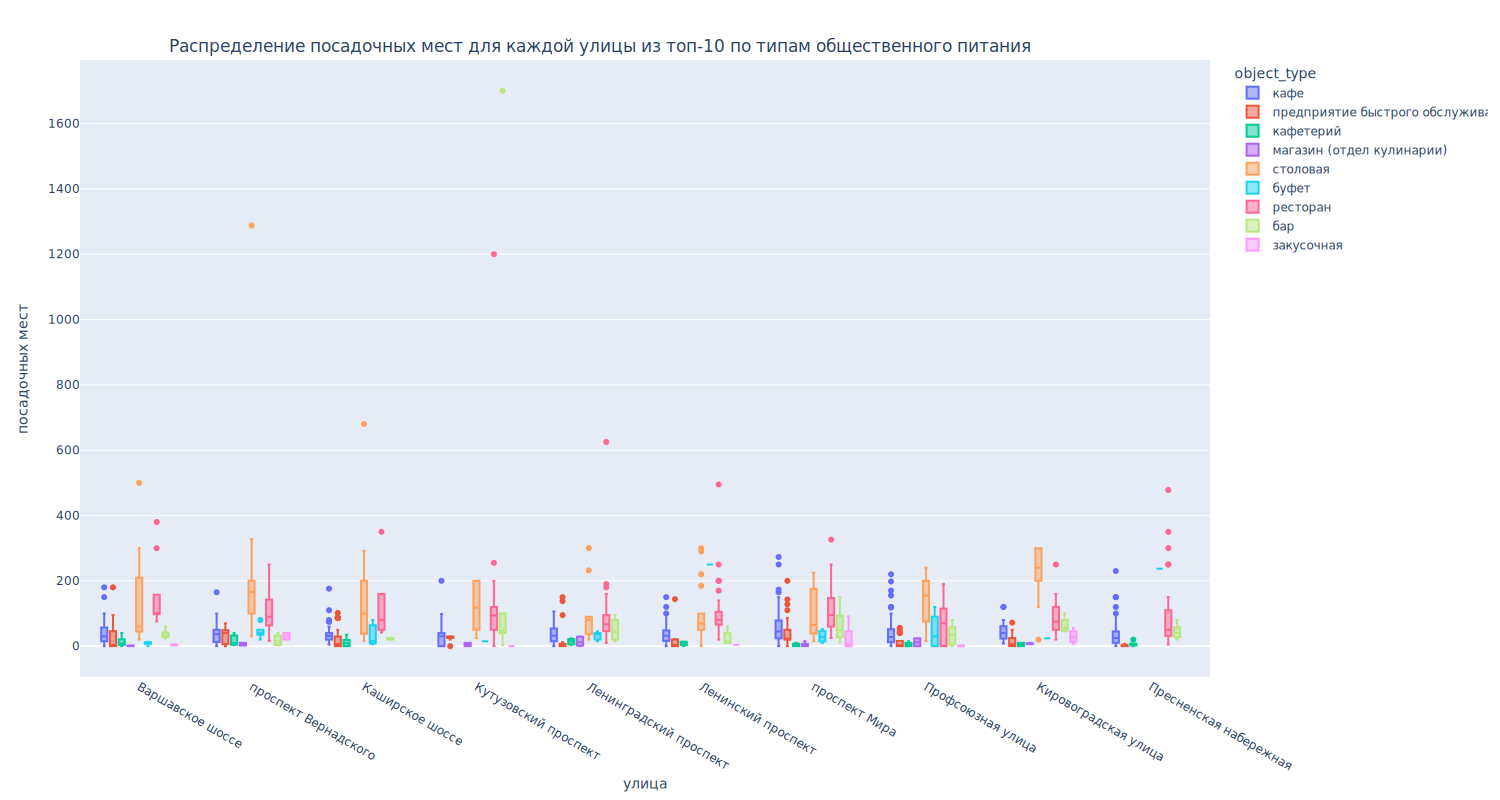

In [57]:
fig = px.box(top_street_rest,x='street',y= 'number', color ='object_type')
fig.update_layout(title={'text': "Распределение посадочных мест для каждой улицы из топ-10 по типам общественного питания", 'xanchor': 'center', 'y':0.95,
        'x':0.4},
                  yaxis_title="посадочных мест", xaxis_title='улица',height=800, width = 1500)
fig.show('svg')

 
Изучив данные и познакомившись с боксплотами можно заявить следующее по каждому типу общественного заведения:
* **Рестораны** : По Медианному значению наибольшее количество на Варшавском шоссе - 98 мест, следом идет Проспект Мира - 96 мест. Замыкает тройку Кутузовский проспект - 94 места. Наименьшее медианное значение по посадочным местам у Профсоюзной улицы - 70, у Ленинградского проспекта - 67 мест, и у Пресненской Набережной - 50 мест.
* **Кафе** : По Медианному значению наибольшее количество на проспекте Мира - 45 мест, следом идет Кировоградская улица - 40 мест. Замыкает тройку проспект Вернадского - 37 места. Наименьшее медианное значение по посадочным местам у Кутузовского проспекта - 30, у Профсоюзной улицы - 28 мест, и у Пресненской Набережной - 25 мест.
* **Столовая** : По Медианному значению наибольшее количество на Кировоградской улице - 240 мест, следом идет Проспект Вернадского - 166 мест. Замыкает тройку Профсоюзная улица - 155 мест. Наименьшее медианное значение по посадочным местам у Ленинского проспекта - 69, у проспекта Мира - 65 мест, и закрывает топ-10 Варшавское шоссе - 60 мест.
* **Предприятие быстрого обслуживания** : По Медианному значению наибольшее количество на проспекта Вернадского - 40 мест, следом идет Кутузовский проспект - 30 мест. Замыкает тройку проспект Мира - 20 мест. Наименьшее медианное значение по посадочным местам у Варшавского шоссе - 2 места, у Ленинградского проспекта и Профсоюзной улицы медианное значение - 0.
* **Бары** : По Медианному значению наибольшее количество на Кировоградской улице - 55 мест, следом идет Проспект Мира - 50 мест. Замыкает тройку Кутузовский проспект - 48 мест. Наименьшее медианное значение по посадочным местам у Каширского шоссе - 23, у Ленинского проспекта и проспекта Вернадского по 14 мест.
*  **Буфет**: Сильно выделяются по медианному значению посадочных мест Ленинский проспект и Пресненская набережная 250 и 237 мест соответственно. Следом идут Ленинградский проспект и проспект Вернадского, поделившие 3 строчку, с существенным отставанием от лидеров и имеющие 40 мест. Замыкает тройку Каширское шоссе - 16 мест, Кутузовский проспект - 15 мест, закрывает топ-10 - Варшавское шоссе с 9 местами.
* **Кафетерий**: По Медианному значению наибольшее количество на Ленинградском проспекте - 15 мест, следом идет ПЛенинский проспект - 12 мест. Замыкает тройку проспект Вернадского - 10 мест. Наименьшее медианное значение по посадочным местам у Кировоградской улицы - 5, Замыкают список топ-10 по медианному значению посадочных мест Пресненская набережная и Профсоюзная улица , имеющие по 4 места.
* **Закусочная**: Сильно выделяются по медианному значению посадочных мест проспект Вернадского и Кировоградская улица 30 и 28 мест соответственно. Следом идут Ленинский проспект и Варшавское шоссе, поделившие 3 строчку, с существенным отставанием от лидеров и имюещие 4 места. Замыкает тройку Профсоюзная улица - 1 мсто, Кутузовский проспект и проспект Мира закрывают топ-10 и имеют - 0 мест по медианному значению.
* **Магазин(отдел кулинарии)** : Первое место по медианному значению посадочных мест делят между собой Ленинградский проспект и Профсоюзная улица, имеющие 12 мест. Второе место между собой поделили Кировоградская улица и проспект Вернадского, имеющие по 6 мест. Замыкают список топ-10 по медианному значению посадочных мест Кутузовский проспект, имеющие 5 мест, проспект Мира - 4 места и Варшавское шоссе с 1 местом. 

Помимо этого посмотрим как распределяются посадочные места в заивисимости от того сетевое заведение или нет по топ-10 улицам:

In [58]:
street_numb_ch = (top_street_rest.groupby(['street','chain'])['number'].quantile([0.25, 0.5, 0.75]).
                unstack()) #если ругается, то необходимо обновить pandas !pip install --upgrade pandas
street_numb_ch

0.25  0.50   0.75
street                 chain                   
Варшавское шоссе       да     8.50 40.00  64.00
                       нет    8.50 26.00  63.75
Каширское шоссе        да    24.00 55.00  87.00
                       нет    5.00 24.00  49.00
Кировоградская улица   да     5.00 30.00  51.50
                       нет    6.00 30.00 100.00
Кутузовский проспект   да     0.00 30.00  50.00
                       нет   30.00 50.00  99.50
Ленинградский проспект да    11.50 34.00  61.25
                       нет   21.50 40.00  80.00
Ленинский проспект     да    22.75 55.50  88.00
                       нет   20.00 45.00  80.00
Пресненская набережная да    15.00 35.00  50.00
                       нет    6.25 26.50  50.00
Профсоюзная улица      да    11.50 44.00  76.25
                       нет    0.00 20.00  54.75
проспект Вернадского   да    37.00 50.00  80.00
                       нет   13.75 40.00  69.50
проспект Мира          да    25.00 60.00 125.00
                       нет   20.00 41.00  80.00

Посмотрим тажке на интерактивные гистограммы боксплот:

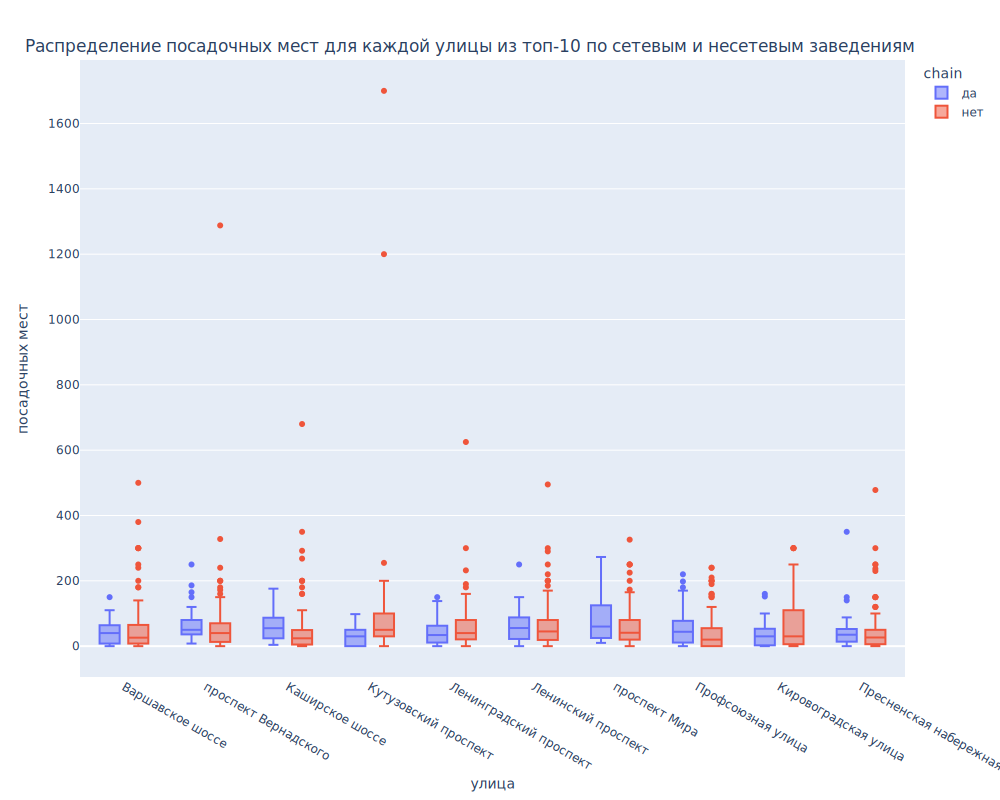

In [59]:
fig = px.box(top_street_rest,x='street',y= 'number', color ='chain')
fig.update_layout(title={'text': "Распределение посадочных мест для каждой улицы из топ-10 по сетевым и несетевым заведениям", 'xanchor': 'center', 'y':0.95,
        'x':0.47},
                  yaxis_title="посадочных мест", xaxis_title='улица',height=800, width = 1000)
fig.show('svg')

Тут можно отметить, что сетевые заведения по медианному значению на всех улицах преобладают по сравнению с несетевыми заведениями за исключением двух улиц - Кутузовского и Ленинского проспекта. Также отметим что сетевые заведения имеют меньше аномальных значений чем несетевые, это говорит о том, что владельцы бизнеса более гибки и менее ориентируются на трафик, также это объясняется тем, что им на это позволяет площадь. Правда не всегда площадь и трафик посетителей коррелируются в тесных связях.

## Этап 3. Общий вывод

Перед нами стояла цель исследовать рынок общественного питания. В нашем распоряжении был датасет с данными о заведениях общественного питания Москвы.

В процессе предобработки убедились, что в данных нет пропусков, также нет дубликатов, что данные с хорошим качеством. В нашем распоряжении была информация о 15366 заведениях.

В дальнейшем было исследовано соотношение видов объектов общественного питания, в итоге было выявлено следующее количество для:
* кафе - 6099 заведений 
* столовая - 2587 заведений 
* ресторан - 2285 заведений 
* предприятие - быстрого обслуживания	1923 заведений 
* бар - 856 заведений 
* буфет	- 585 заведений 
* кафетерий	- 398 заведений 
* закусочная - 360 заведений 
* магазин - (отдел кулинарии)	273 заведений 

Лидером является такой тип заведений как Кафе и это можно объяснить универсальностью понятия на Российском рынке. Кафе - универсальное предприятие, которое легко перестроить на новые рельсы, можно изменить меню и сделать уклон в сторону кофейни, можно сделать уклон на кондитерскую продукцию, а можно организовать все под столовую с линией раздачи. Следом идут столовые и это объяснимо, Москва - мегаполис, имеется много бизнес центров, нуждающихся в столовых. Третье место в по количеству заведений занимают рестораны. Тут следует сделать ремарку на то, что рестораном стараются назвать многое, даже исходя из маркетинговых соображений.

При исследовании соотношения сетевых и несетевых заведений по количеству было выявлено, что 12938 заведений с долей 80.68% являются несетевыми, в то время как 2968 заведений с долей 19.32% напротив - сетевые. 

При последующем анализе было выявлено, что сетевое расространение наиболее характерно для таких типов общественного питания как :
* Кафе
* Предприятия быстрого обслуживания
* Рестораны

Помимо этого:
* Всего сетевых заведений 2968
* Среднее значение посадочных мест- 53
* Медианное значение 40 мест
* Значение моды составляет 0 мест
* До 75% значений имеет 72 посадочных места
* Максимально встречающее посадочное место - 580.
* Встречаются аномальные значения выше 157 посадочных мест

Таким образом для сетевых заведений характерно много заведений с небольшим числом посадочных мест.

В дальнейшем было проанализировано среднее количество посадочных места для каждого вида общественного питания и был сделан следующий вывод. Наибольшее медианное значение посадочных мест в столовых - 103 посадочных места. Следом идут рестораны с медианным значением посадочных мест - 80 мест и следом бары - 30 мест. Для закусочных и магазинов медианное значение составляет - 0 мест. Было отмечено, что медианные значения посадочных мест у сетевых заведений везде больше, помимо такого типа общественного питания как кафе. В тех же закусочных и магазинов для сетевых заведений посадочных мест - 8 и 3.5 соответственно, в то время как для несетевых заведений медианные значения в обоих случаях - 0 мест.

Были изучены улицы с наибольшим количеством заведений:
проспект Мира	204
* Профсоюзная улица	- 182 заведения
* Ленинградский проспект - 171 заведения
* Пресненская набережная - 167 заведения
* Варшавское шоссе - 164 заведения
* Ленинский проспект - 147 заведения
* проспект Вернадского - 132 заведения
* Кутузовский проспект - 114 заведения
* Каширское шоссе - 112 заведения
* Кировоградская улица - 110 заведения

Заведений, где на одной улице всего одно заведения общественного питания - 713. Если акцентировать внимание на районы, то наибольшее число улиц, где всего одно заведение это Таганский район - 27 заведений, Район Хамовники - 26, Басманный район - 25, Тверской район - 20, Пресненский район - 19 заведений. Также встречаются районы, где располагается всего одно заведение общественного питания.

Проведя данное исследование и имея тематику официантов-роботов будут предложены следующие рекомендации:
* Выбрать из топ-10 улиц, центральные, так как удивить роботом-официантом в спальном районе будет сложнее. Центральную часть посещает большое количество туристов и жителей Москвы, которым доставляет удовольствие пройтись по центральным улицам, а если еще удивит и робот-официант, это это будет приятным дополнением к эмоциям и интересное воспоминание.
* Выбор именно кафе наиболее универсален, так как кафе более обширно в плане деятельности, роботу можно выделить отдельную роль, например чтоб он выполнял функции официанта или перепрограммировать его и сделать роботом-бариста, который приготовит отменный кофе, учитывая уровень влажности помещения за счет своих датчиков и избежит проблемы извечной настройки помола для кофемолки. 
* Так как идея пока не реализовывалась, то можно совместить персонал людей и одного работа. Так как "Вау эффект" будет и от одного, а в дальнейшем с развитием бизнеса увеличить количество роботов и сократить найм живой рабочей силы.
* Заведение должно быть с небольшим уровнем посадочных мест.
* Избегать открытия заведения именно рядом с бизнес-центрами, так как 'Вау-эффект' будет краткосрочный.


## Презентация

<p><a href ="https://disk.yandex.ru/i/5otMESFyMUiJEQ">Ссылка на презентацию.</a>  </p>